# Student Survey Analysis

### Author: Ahmad Arrabi

This work presents a simple analysis of a survey on online learning. Our aim is to be comfortable coding with python and to use it as a tool to gain insight, visualize, and interpret our data.

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Make sure your data is in csv format. In this case, we converted from '.xlsx' to '.csv'

In [287]:
survey = pd.read_csv('students_survey.csv')

## Dataset Overview

In [288]:
survey.head(8)

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes
0,8-31-2020 10:24:49,Male,Off (Other reason),On (To answer Teacher),Laptop,"Eye Strain, Headache",Yes,Black board teaching,Yes,Offline classes,NaN
1,8-31-2020 17:39:42,Male,Off (No webcam available),On (To answer Teacher),Computer,Eye Strain,Yes,Presentations (ppt),Yes,Online classes,"Good Teaching , But It can be improved"
2,8-31-2020 17:40:39,Male,On (When teacher asks),On (To answer Teacher),Laptop,"Eye Strain, Back pain, Headache",Yes,Black board teaching,No,Offline classes,I would prefer offline classes
3,8-31-2020 17:43:43,Male,On (All the time),On (To answer Teacher),Computer,"Eye Strain, Back pain",Yes,Presentations (ppt),Yes,Offline classes,NaN
4,8-31-2020 17:44:06,Female,On (When teacher asks),On (To answer Teacher),"Phone, Laptop","Eye Strain, Back pain, Headache",No,Black board teaching,No,Offline classes,NaN
5,8-31-2020 17:44:33,Male,On (When teacher asks),On (To answer Teacher),Laptop,Headache,Yes,Presentations (ppt),No,Offline classes,NaN
6,8-31-2020 17:46:44,Female,On (When teacher asks),On (To answer Teacher),"Phone, Tab, Laptop, Computer","Eye Strain, Back pain, Headache",Yes,Black board teaching,Yes,Offline classes,NaN
7,8-31-2020 17:47:08,Male,On (All the time),On (To answer Teacher),Tab,Back pain,No,Black board teaching,No,Online classes,NaN


In [289]:
survey.shape

(746, 11)

In [290]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Timestamp                                                                                        746 non-null    object
 1   Gender                                                                                           746 non-null    object
 2   Webcam status during class                                                                       746 non-null    object
 3   Mic status during class                                                                          746 non-null    object
 4   Which device do you use for online classes?                                                      746 non-null    object
 5   Did you face an

In [291]:
survey.describe()

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes
count,746,746,746,746,746,746,746,746,746,746,247
unique,733,2,6,5,15,35,2,2,2,2,183
top,9-3-2020 13:38:25,Female,On (When teacher asks),On (To answer Teacher),Laptop,No Issue,No,Black board teaching,No,Offline classes,Good
freq,2,384,366,493,323,87,390,515,435,585,17


By using the describe function, we can know the most frequent answer for each question. It is apparent that students were not satisfied with online teaching.

## Understanding the answers

Let's first take a look at how much do students interact in the class (webcam/mic)

In [292]:
survey['Webcam status during class'].value_counts()

On (When teacher asks)       366
On (All the time)            124
Off (Other reason)            89
Off (Shy to switch on)        57
Off (No webcam available)     56
Off (Untidy appearance)       54
Name: Webcam status during class, dtype: int64

C:\Users\ahmad\anaconda3\lib\site-packages\pandas\core\indexing.py:1842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


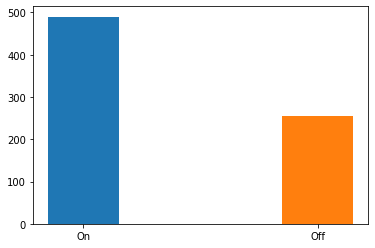

In [293]:
webcam_on = survey.loc[survey['Webcam status during class'].str.startswith('On')]
webcam_off = survey.loc[survey['Webcam status during class'].str.startswith('Off')]

webcam_on.loc[:,('Webcam status during class')] = 'On'

webcam_off.loc[:,('Webcam status during class')] = 'Off'

plt.bar(x = webcam_on['Webcam status during class'], height = len(webcam_on), width = 0.3, align='center')
plt.bar(x = webcam_off['Webcam status during class'], height = len(webcam_off), width = 0.3, align='center')
plt.show()

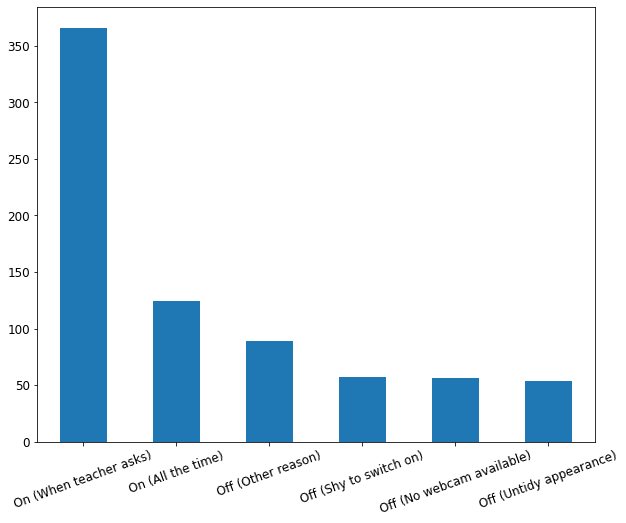

In [294]:
survey['Webcam status during class'].value_counts().plot(kind = 'bar', figsize = (10,8), fontsize=12)
plt.xticks(rotation =20)
plt.show()

In [295]:
survey['Mic status during class'].value_counts()

On (To answer Teacher)        493
Always On                      88
Off (Do not want to reply)     63
Off (Other reason)             58
Off (No mic available)         44
Name: Mic status during class, dtype: int64

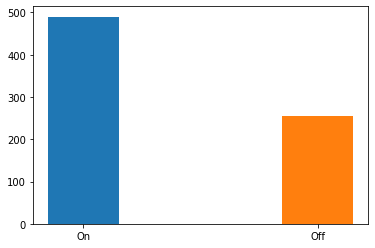

In [296]:
mic_on = survey.loc[survey['Mic status during class'].str.startswith('On') |
                    survey['Mic status during class'].str.startswith('Always')]

mic_off = survey.loc[survey['Mic status during class'].str.startswith('Off')]

mic_on.loc[:,('Mic status during class')] = 'On'
mic_off.loc[:,('Mic status during class')] = 'Off'

plt.bar(x = mic_on['Mic status during class'], height = len(webcam_on), width = 0.3, align='center')
plt.bar(x = mic_off['Mic status during class'], height = len(webcam_off), width = 0.3, align='center')
plt.show()

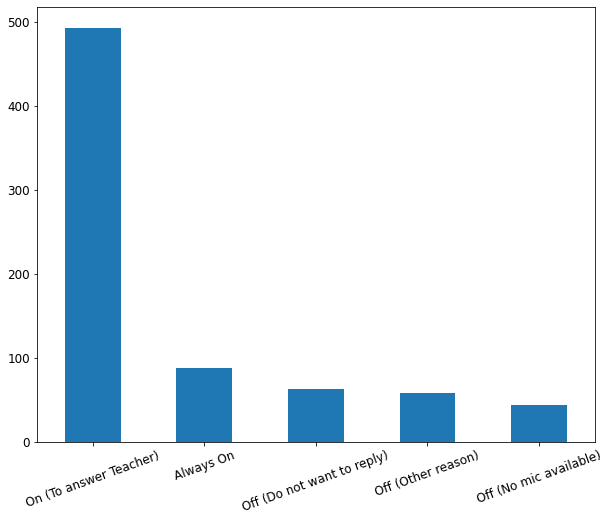

In [297]:
survey['Mic status during class'].value_counts().plot(kind='bar', figsize = (10, 8), fontsize = 12)
plt.xticks(rotation =20)
plt.show()

Now we want to determine students' overall interaction in classes, which can be defined as students who have either the mic or the webcam enabled.

We didn't change the index so if we joined datasets on index, and filtered out students with both webcam and mic on, then we'll get interactive students.

In [298]:
mic_on = mic_on.filter(['Mic status during class'])
mic_off = mic_off.filter(['Mic status during class'])
webcam_on = webcam_on.filter(['Webcam status during class'])
webcam_off = webcam_off.filter(['Webcam status during class'])

In [299]:
interactive_students = webcam_on.join(mic_on, how = 'outer')

lazy_students = webcam_off.join(mic_off, how = 'outer')

Notice that outer joins lead to null values, so we have to deal with that !

In [300]:
interactive_students.fillna('NULL', inplace = True)
lazy_students.fillna('NULL', inplace = True)

In [301]:
interactive_students = interactive_students.loc[(interactive_students['Mic status during class'] == 'On') |
                        (interactive_students['Webcam status during class'] == 'On')]

lazy_students = lazy_students.loc[(lazy_students['Mic status during class'] == 'Off') &
                        (lazy_students['Webcam status during class'] == 'Off')]

In [302]:
interactive_students['active'] = True

lazy_students['active'] = False

interactive_students = interactive_students.filter(['active'])

lazy_students = lazy_students.filter(['active'])

In [303]:
survey = survey.join(interactive_students)
survey['active'].fillna(False, inplace = True)

In [317]:
survey['active'].value_counts(normalize = True)

True     0.831099
False    0.168901
Name: active, dtype: float64

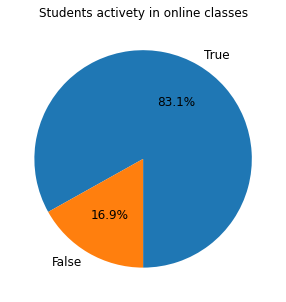

In [321]:
survey['active'].value_counts(normalize = True).plot(figsize = (5,5), kind = 'pie', ylabel = '', autopct='%1.1f%%', startangle=270, fontsize=12, title = 'Students activety in online classes')
plt.show()

Let's analyze another answer, which is Which device do you use for online classes?

In [324]:
survey['Which device do you use for online classes?'].value_counts()

Laptop                          323
Phone                           166
Phone, Laptop                   105
Computer                         40
Tab                              35
Phone, Tab, Laptop, Computer     15
Tab, Laptop                      14
Phone, Tab, Laptop               12
Laptop, Computer                 10
Phone, Tab                       10
Phone, Laptop, Computer           8
Phone, Computer                   3
Tab, Laptop, Computer             2
Tab, Computer                     2
Phone, Tab, Computer              1
Name: Which device do you use for online classes?, dtype: int64

Notice that there are multiple devices in one string